### Importing libraries

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

### Reading the data and converting the timestamp column to a default format

In [2]:
#ap.Month[1]

#Since the month column is taken as string and not date, so we need to convert this column to date

def parser(x):
    return datetime.strptime(x,'%Y-%m')

ap = pd.read_csv("airpassengers.csv", index_col = [0] , parse_dates = [0], date_parser = parser)
ap.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
#Now it is converted to timestamp
#ap.Month[1]

### Plotting the graph

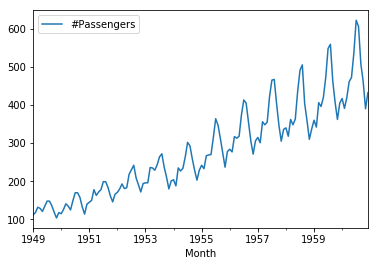

In [4]:
ap.plot()

### Checking Stationarity of time series


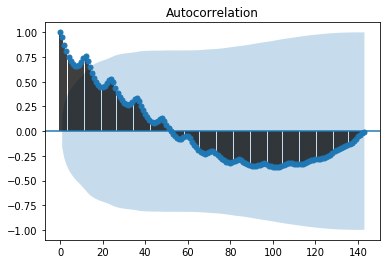

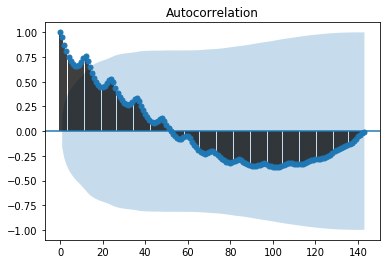

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ap)

### Converting series to stationary

In [6]:
ap_diff = ap.diff(periods = 1)
#integrated of order 1

In [7]:
ap_diff = ap_diff[1:]
ap_diff.head(5)

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


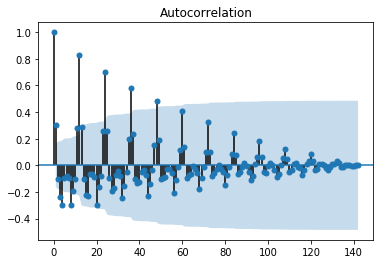

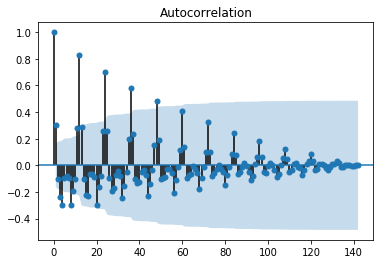

In [8]:
#checking stationarity
plot_acf(ap_diff)

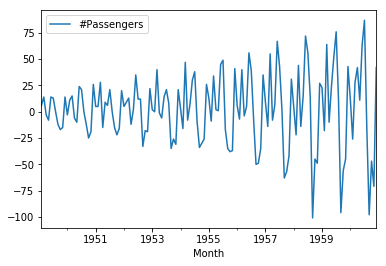

In [9]:
#now we see that the series is stationary
ap_diff.plot()

### Fitting the model using ARIMA

In [10]:
#importing library
from statsmodels.tsa.arima_model import ARIMA

In [11]:
#Splitting the data into train and test. 80% train, 20%test

train = ap.iloc[:int(ap.shape[0]*0.80),:]
test = ap.iloc[int(ap.shape[0]*0.80):,:]


predictions = []
train.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
#p,d,q
model_arima = ARIMA(train, order = (1,0,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

C:\Users\Skoruz-User01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Skoruz-User01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


1092.214249426808


In [13]:
predictions = model_arima_fit.forecast(steps = 29)[0]
predictions

array([486.17361724, 481.45127959, 476.8307441 , 472.30981616,
       467.88634847, 463.55824002, 459.32343511, 455.17992232,
       451.12573364, 447.15894343, 443.27766761, 439.48006269,
       435.76432493, 432.12868947, 428.57142951, 425.09085544,
       421.68531412, 418.35318802, 415.09289448, 411.90288498,
       408.78164434, 405.72769009, 402.7395717 , 399.81586989,
       396.95519601, 394.15619133, 391.41752641, 388.73790046,
       386.11604076])

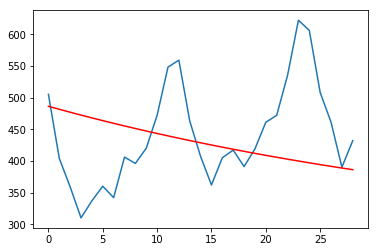

In [14]:
plt.plot(test.values)
plt.plot(predictions, color = "red")

In [15]:
##Performing Grid search - hyper parameter tuning

import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))


In [16]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order = param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

#we can select the minimum value of aic and make the corresponding order value the order of p,d,q 

(0, 0, 0) 1367.7265241664854
(0, 0, 1) 1232.9157473231803
(0, 1, 0) 1076.518771084965
(0, 1, 1) 1064.6239195875157
(0, 1, 2) 1061.077902121638
(0, 1, 3) 1063.0615711476926
(0, 1, 4) 1040.47201296563
(0, 2, 0) 1107.6860243213748
(0, 2, 1) 1074.2772515867907
(0, 2, 2) 1061.9757574737785
(0, 2, 3) 1058.8882071260286
(1, 0, 0) 1092.214249426808
(1, 0, 1) 1078.0735644785511
(1, 0, 2) 1076.2994685417827
(1, 0, 3) 1077.4905532774249
(1, 0, 4) 1066.5753484616403
(1, 1, 0) 1069.439939269536
(1, 1, 1) 1058.8346607201279
(1, 1, 2) 1046.0521339255645
(1, 1, 3) 1047.9114113868745
(1, 2, 0) 1103.0585842971727
(1, 2, 1) 1066.7661450274
(1, 2, 2) 1056.431935414379
(1, 2, 3) 1057.6454863201745
(1, 2, 4) 1059.6350053413335
(2, 0, 0) 1083.1337705216201
(2, 0, 1) 1073.718303414358
(2, 0, 2) 1073.76716966657
(2, 0, 3) 1075.3927899384416
(2, 0, 4) 1086.3812006280887
(2, 1, 0) 1066.2025865821902
(2, 1, 1) 1045.6595915382059
(2, 1, 2) 1047.193115960273
(2, 1, 3) 1045.7968883070687
(2, 1, 4) 1024.759883816178


### Rmse value 

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.values, predictions))
print(rms)

95.78744325859007


### Using Auto arima for forecasting

In [18]:
#Importing libraries

import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [19]:
#Reading data

def parser(x):
    return datetime.strptime(x,'%Y-%m')

ap = pd.read_csv("airpassengers.csv", index_col = [0] , parse_dates = [0], date_parser = parser)
#ap.head

### Splitting data into train and test


In [20]:
train = ap.iloc[:int(ap.shape[0]*0.80),:]
test = ap.iloc[int(ap.shape[0]*0.80):,:]

### Model fitting

In [21]:
from pmdarima import auto_arima

# seasonality - true
arima_model = auto_arima(ap, start_p=0, start_q=0,
                        max_p=5, max_q=5, m=12,
                        start_P=0, seasonal=True, start_d=1, max_d=5, D=2, # start_P, start_Q, max_P, max_Q
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

print(arima_model.aic())


# arima_model = auto_arima(ap, start_p=0, start_q=0,
#                         max_p=5, max_q=5, m=12,
#                         start_P=0, max_P=5, seasonal=True, 
#                         max_d=3, 
#                         max_D =3,
#                         start_Q=0, max_Q=5,
#                         trace=True,
#                         error_action='ignore',  
#                         suppress_warnings=True, 
#                         stepwise=True)

# print(arima_model.aic())


#D=1
# arima_model_D = auto_arima(ap, start_p=0, start_q=0,
#                         max_p=5, max_q=5, m=12,
#                         start_P=0, seasonal=True, start_d=1, max_d =5, D=1, # start_P, start_Q, max_P, max_Q
#                         trace=True,
#                         error_action='ignore',  
#                         suppress_warnings=True, 
#                         stepwise=True)

# print(arima_model.aic())



## Seasonality - false
# arima_model_ns = auto_arima(ap, start_p=0, start_q=0,
#                             max_p=5, max_q=5, m=12,
#                             start_P=0, seasonal=False,
#                             start_d=1, max_d =5, D=2,# start_P, start_Q, max_P, max_Q
#                             trace=True,
#                             error_action='ignore',  
#                             suppress_warnings=True, 
#                             stepwise=True)

# print(arima_model_ns.aic())    

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 2, 1, 12); AIC=1035.801, BIC=1044.164, Fit time=1.009 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 2, 0, 12); AIC=1112.921, BIC=1118.496, Fit time=0.045 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 2, 0, 12); AIC=983.698, BIC=994.848, Fit time=1.061 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 2, 1, 12); AIC=995.719, BIC=1006.869, Fit time=2.177 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 2, 0, 12); AIC=1024.289, BIC=1032.651, Fit time=0.194 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 2, 0, 12); AIC=976.587, BIC=990.524, Fit time=1.924 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 2, 1, 12); AIC=955.182, BIC=971.907, Fit time=4.671 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 2, 1, 12); AIC=1025.710, BIC=1039.648, Fit time=2.031 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 2, 1, 12); AIC=945.066, BIC=964.578, Fit time=5.585 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_o

In [22]:
# # [3,4,6,10,12,18]
# models = [0,0]
# for i,season in zip(range(len(models)),[True,False]):
# #     print(i,season)
#     models[i]  = auto_arima(ap, start_p=0, start_q=0,
#                             max_p=5, max_q=5, m=12,
#                             start_P=0, seasonal=season,
#                             start_d=1, max_d =5, D=2,# start_P, start_Q, max_P, max_Q
#                             trace=True,
#                             error_action='ignore',  
#                             suppress_warnings=True, 
#                             stepwise=True)
    


In [23]:
arima_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 0, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 2, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

### Forecasting on test data

In [24]:
predictions, conf_int = arima_model.predict(n_periods=len(test), return_conf_int=True)
# predictions, conf_int = models[0].predict(n_periods=28, return_conf_int=True)
# predictions = pd.DataFrame(predictions, index = test.index, columns=['Prediction'])

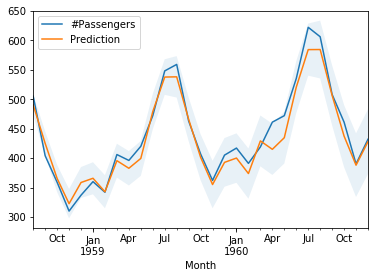

In [25]:
predictions = pd.DataFrame(predictions, index = test.index, columns=['Prediction'])
pd.concat([test, predictions], axis=1).plot()
plt.fill_between(test.index,conf_int[:,0],conf_int[:,1],alpha = 0.1)
plt.show()

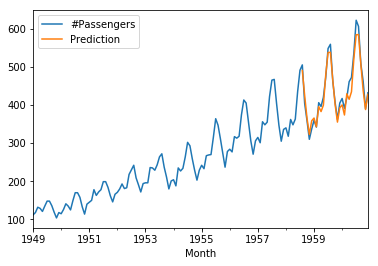

In [26]:
pd.concat([ap,predictions],axis=1).plot()

### Calculating rmse

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.values, predictions.values))
print(rms)

18.40234968478287
